In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_recall_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [81]:
customers_final = pd.read_csv ('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement_final = pd.read_csv ('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing_final = pd.read_csv ('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions_final = pd.read_csv ('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [82]:
customers_final.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [83]:
customers_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [84]:
engagement_final.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [85]:
engagement_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [86]:
marketing_final.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [87]:
marketing_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB


In [88]:
transactions_final.head()

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


In [89]:
transactions_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [90]:
marketing_agg = marketing_final[marketing_final['response']=='Yes'].groupby('customer_id')['campaign_id'].count().to_frame()

In [91]:
transactions_agg = transactions_final.groupby('customer_id').aggregate({'transaction_id':'count','transaction_amount':'sum'})

In [92]:
customers_final.set_index('customer_id', inplace=True)
engagement_final.set_index('customer_id', inplace=True)

In [93]:
joint_data = customers_final.join(engagement_final).join(transactions_agg).join(marketing_agg)

In [94]:
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id
customer_id,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,1.0
2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,9,6081.32,2.0
3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,6,1454.87,1.0
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,1.0
5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,24,15524.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,NaN
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,1.0


In [95]:
num_rows = joint_data.shape[0]

In [96]:
f'The number of rows in joint_data is: {num_rows}'

'The number of rows in joint_data is: 10000'

### DATA CLEANING

#### Gender

In [97]:
joint_data.isnull().sum()

join_date                     0
last_purchase_date            0
age                        1009
gender                      533
location                      0
number_of_site_visits         0
number_of_emails_opened       0
number_of_clicks              0
transaction_id                0
transaction_amount            0
campaign_id                2335
dtype: int64

In [98]:
age_data = joint_data['age'].dropna()

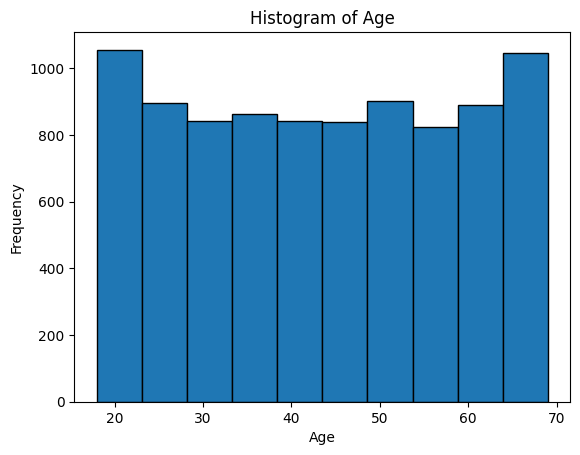

In [99]:
plt.hist(age_data, bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [100]:
skewness = age_data.skew()
kurtosis = age_data.kurt()

In [101]:
(f'Skewness: {skewness}')

'Skewness: -0.0007142573102785634'

In [102]:
(f'Kurtosis: {kurtosis}')

'Kurtosis: -1.2193730504932299'

In [103]:
# Calculate the mean of the 'age' column, excluding missing values
mean_age = joint_data['age'].mean()

# Fill missing values with the mean and assign back to the 'age' column
joint_data['age'] = joint_data['age'].fillna(mean_age)

#### Gender

In [104]:
gender_counts = joint_data['gender'].value_counts()

In [105]:
gender_counts

gender
Male      4769
Female    4698
Name: count, dtype: int64

In [106]:
# Fill missing values with the mean and assign back to the 'age' column
joint_data['age'] = joint_data['age'].fillna(mean_age)

# Calculate the mode of the 'gender' column, excluding missing values
mode_gender = joint_data['gender'].mode()[0]

# Fill missing values with the mode and assign back to the 'gender' column
joint_data['gender'] = joint_data['gender'].fillna(mode_gender)

# Display the DataFrame to check the changes
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id
customer_id,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.000000,Female,North Shannonbury,10,15,1,6,3509.48,1.0
2,2021-09-08,2023-10-25,43.467467,Male,Hillville,285,49,51,9,6081.32,2.0
3,2021-06-01,2022-11-27,43.467467,Male,North Latoyatown,192,73,25,6,1454.87,1.0
4,2022-01-01,2022-09-01,29.000000,Male,Grossstad,110,30,17,20,7874.68,1.0
5,2022-01-24,2023-06-02,43.467467,Male,East Matthewfort,161,2,7,24,15524.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.000000,Female,Johnstonborough,119,47,16,10,5498.20,NaN
9997,2022-07-09,2023-01-25,26.000000,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9998,2023-09-17,2024-01-30,39.000000,Male,New John,53,17,5,3,3503.13,1.0


#### Campaign ID

In [107]:
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id
customer_id,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.000000,Female,North Shannonbury,10,15,1,6,3509.48,1.0
2,2021-09-08,2023-10-25,43.467467,Male,Hillville,285,49,51,9,6081.32,2.0
3,2021-06-01,2022-11-27,43.467467,Male,North Latoyatown,192,73,25,6,1454.87,1.0
4,2022-01-01,2022-09-01,29.000000,Male,Grossstad,110,30,17,20,7874.68,1.0
5,2022-01-24,2023-06-02,43.467467,Male,East Matthewfort,161,2,7,24,15524.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.000000,Female,Johnstonborough,119,47,16,10,5498.20,NaN
9997,2022-07-09,2023-01-25,26.000000,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9998,2023-09-17,2024-01-30,39.000000,Male,New John,53,17,5,3,3503.13,1.0


In [108]:
joint_data['campaign_id'] = joint_data['campaign_id'].fillna(0)

In [109]:
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id
customer_id,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.000000,Female,North Shannonbury,10,15,1,6,3509.48,1.0
2,2021-09-08,2023-10-25,43.467467,Male,Hillville,285,49,51,9,6081.32,2.0
3,2021-06-01,2022-11-27,43.467467,Male,North Latoyatown,192,73,25,6,1454.87,1.0
4,2022-01-01,2022-09-01,29.000000,Male,Grossstad,110,30,17,20,7874.68,1.0
5,2022-01-24,2023-06-02,43.467467,Male,East Matthewfort,161,2,7,24,15524.55,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.000000,Female,Johnstonborough,119,47,16,10,5498.20,0.0
9997,2022-07-09,2023-01-25,26.000000,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9998,2023-09-17,2024-01-30,39.000000,Male,New John,53,17,5,3,3503.13,1.0


### Feature Engineering

In [110]:
# Verify columns in joint_data
print(joint_data.columns)

Index(['join_date', 'last_purchase_date', 'age', 'gender', 'location',
       'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks',
       'transaction_id', 'transaction_amount', 'campaign_id'],
      dtype='object')


In [111]:
import pandas as pd

# Assuming `transactions_final` and `marketing_final` DataFrames are available

# Convert dates to datetime
transactions_final['transaction_date'] = pd.to_datetime(transactions_final['transaction_date'])

# Calculate Recency, Frequency, and Monetary for transactions
current_date = pd.to_datetime('2024-07-13')
recency = transactions_final.groupby('customer_id')['transaction_date'].max().reset_index()
recency['recency'] = (current_date - recency['transaction_date']).dt.days

frequency = transactions_final.groupby('customer_id').size().reset_index(name='frequency')

monetary = transactions_final.groupby('customer_id')['transaction_amount'].sum().reset_index(name='monetary')

# Merge RFM features
rfm = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')

# Merge RFM features back into joint_data
joint_data = joint_data.merge(rfm, on='customer_id', how='left')

# Verify columns in marketing_final
print(marketing_final.columns)

# Create marketing features from marketing_final
marketing_features = marketing_final.groupby('customer_id').agg({
    'response': lambda x: (x == 'Yes').mean(),  # Calculate response rate
    'promotion_type': 'nunique'  # Number of unique promotions received
}).reset_index()

# Merge marketing features into joint_data
joint_data = joint_data.merge(marketing_features, on='customer_id', how='left')

# Handle any remaining missing values
joint_data.fillna(0, inplace=True)

# Display the feature-engineered DataFrame
joint_data.head()


Index(['campaign_id', 'customer_id', 'response', 'promotion_type',
       'campaign_date'],
      dtype='object')


,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,transaction_date,recency,frequency,monetary,response,promotion_type
0,1,2023-11-20,2024-03-17,56.000000,Female,North Shannonbury,10,15,1,6,3509.48,1.0,2024-03-12,123,6,3509.48,0.25,3
1,2,2021-09-08,2023-10-25,43.467467,Male,Hillville,285,49,51,9,6081.32,2.0,2023-02-26,503,9,6081.32,0.50,2
2,3,2021-06-01,2022-11-27,43.467467,Male,North Latoyatown,192,73,25,6,1454.87,1.0,2022-11-18,603,6,1454.87,0.50,1
3,4,2022-01-01,2022-09-01,29.000000,Male,Grossstad,110,30,17,20,7874.68,1.0,2022-08-31,682,20,7874.68,0.25,3
4,5,2022-01-24,2023-06-02,43.467467,Male,East Matthewfort,161,2,7,24,15524.55,0.0,2023-06-01,408,24,15524.55,0.00,3


#### Calculate CLV

In [128]:
# Calculate Average Purchase Value for each customer
joint_data['average_purchase_value'] = joint_data['monetary'] / joint_data['frequency']

# Calculate Average Purchase Frequency Rate (assuming you have tenure in months for a better rate calculation)
joint_data['average_purchase_frequency'] = joint_data['frequency'] / (joint_data['tenure'] / 30)

# Calculate Customer Value
joint_data['customer_value'] = joint_data['average_purchase_value'] * joint_data['average_purchase_frequency']

# Calculate Average Customer Lifespan (in months)
average_customer_lifespan = joint_data['tenure'].mean() / 30  # Converting days to months

# Calculate CLV for Each Customer
joint_data['clv'] = joint_data['customer_value'] * average_customer_lifespan

# Display the DataFrame with CLV for each customer
joint_data[['customer_id', 'clv']]


,customer_id,clv
0,1,12589.596268
1,2,4955.224592
2,3,1082.338136
3,4,7215.093735
4,5,14587.311723
...,...,...
9995,9996,8095.314453
9996,9997,6736.329743
9997,9998,9885.895916
9998,9999,7158.192420


### Model Selection

#### Linear

#### Logistic

#### KNN